# Model 3rd ハイパーパラメータ可視化探索

Nadaraya-Watson推定のハイパーパラメータを可視化による比較で最適化します。
すべての組み合わせについてplot_ratio_mapを実行し、見た目で最適なパラメータを判断します。

## 1. ライブラリのインポート

In [1]:
import os
import sys

# パスの追加（必要に応じて調整）
sys.path.append(os.path.dirname(os.path.dirname(os.path.abspath("__file__"))))

import japanize_matplotlib

japanize_matplotlib.japanize()
import time

# 警告の抑制
import warnings
from itertools import product

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import polars as pl
from tqdm import tqdm

from bayesian_statistics.model3_config import Model3Config, Model3Pipeline
from bayesian_statistics.model3_nadaraya_watson import NadarayaWatsonEstimator
from bayesian_statistics.models.visualization import ObsidianVisualizer

warnings.filterwarnings("ignore")

ModuleNotFoundError: No module named 'bayesian_statistics.model3_config'

## 2. 設定の定義

In [ ]:
# データディレクトリの設定
data_dir = "/home/ohta/dev/bayesian_statistics/data/"

# 設定オブジェクトの作成
config = Model3Config(
    data_dir=data_dir,
    x_min=138,
    x_max=141,
    y_min=34,
    y_max=37,
    nw_sigma=500,
    nw_sigma_for_sites=0.1,
    mcmc_iterations=30000,
    burn_in=5000,
)

print("設定内容:")
print(f"  データディレクトリ: {config.data_dir}")
print(f"  領域: [{config.x_min}, {config.x_max}] × [{config.y_min}, {config.y_max}]")
print(f"  NWバンド幅: {config.nw_sigma} (グリッド), {config.nw_sigma_for_sites} (遺跡)")

設定内容:
  データディレクトリ: /home/ohta/dev/bayesian_statistics/data/
  領域: [138, 141] × [34, 37]
  NWバンド幅: 500 (グリッド), 0.1 (遺跡)


## 3. 前処理

In [ ]:
# パイプラインの初期化
pipeline = Model3Pipeline(config)

# 前処理の実行
preprocessor = pipeline.run_preprocessing()

=== 前処理を開始 ===
データを読み込んでいます...
標高データ: (1357520, 42)
黒曜石データ: (30070, 11)
遺跡データ: (274, 49)


## 4. ハイパーパラメータ探索の設定

In [ ]:
# ハイパーパラメータ探索の設定
sigma_candidates = [300, 500, 700, 1000, 1500]
sigma_for_sites_candidates = [0.1]

# 評価対象の設定
target_period = 0  # 早期・早々期
target_origins = ["神津島", "信州"]

print("グリッドサーチ設定:")
print(f"  sigma候補: {sigma_candidates}")
print(f"  sigma_for_sites候補: {sigma_for_sites_candidates}")
print(
    f"  評価対象: {target_period} ({config.time_periods[target_period]}), {target_origins}"
)
print(
    f"  総候補数: {len(sigma_candidates) * len(sigma_for_sites_candidates)} 組み合わせ"
)
print(
    f"  総図数: {len(sigma_candidates) * len(sigma_for_sites_candidates) * len(target_origins)} 枚"
)

# パラメータ組み合わせ一覧表
print("\n【パラメータ組み合わせ一覧】")
print("組み合わせ番号 | sigma | sigma_for_sites")
print("-" * 40)
combination_counter = 0
for sigma in sigma_candidates:
    for sigma_for_sites in sigma_for_sites_candidates:
        combination_counter += 1
        print(
            f"      {combination_counter:2d}       | {sigma:4d} |     {sigma_for_sites:.2f}"
        )

グリッドサーチ設定:
  sigma候補: [300, 500, 700, 1000, 1500]
  sigma_for_sites候補: [0.1]
  評価対象: 0 (早期・早々期), ['神津島', '信州']
  総候補数: 5 組み合わせ
  総図数: 10 枚

【パラメータ組み合わせ一覧】
組み合わせ番号 | sigma | sigma_for_sites
----------------------------------------
       1       |  300 |     0.10
       2       |  500 |     0.10
       3       |  700 |     0.10
       4       | 1000 |     0.10
       5       | 1500 |     0.10


## 5. 神津島の可視化結果（全パラメータ組み合わせ）

以下では神津島について、すべてのパラメータ組み合わせで可視化を行います。
各図を見て、最も適切と思われる分布パターンを持つパラメータを記録してください。


=== 神津島 のハイパーパラメータ比較 ===
全 5 組み合わせの可視化
各図を見て、最も適切と思われる分布パターンを記録してください。



神津島:   0%|          | 0/5 [00:00<?, ?it/s]

creating weights matrix...
calculating distance_W...
updating weights matrix...


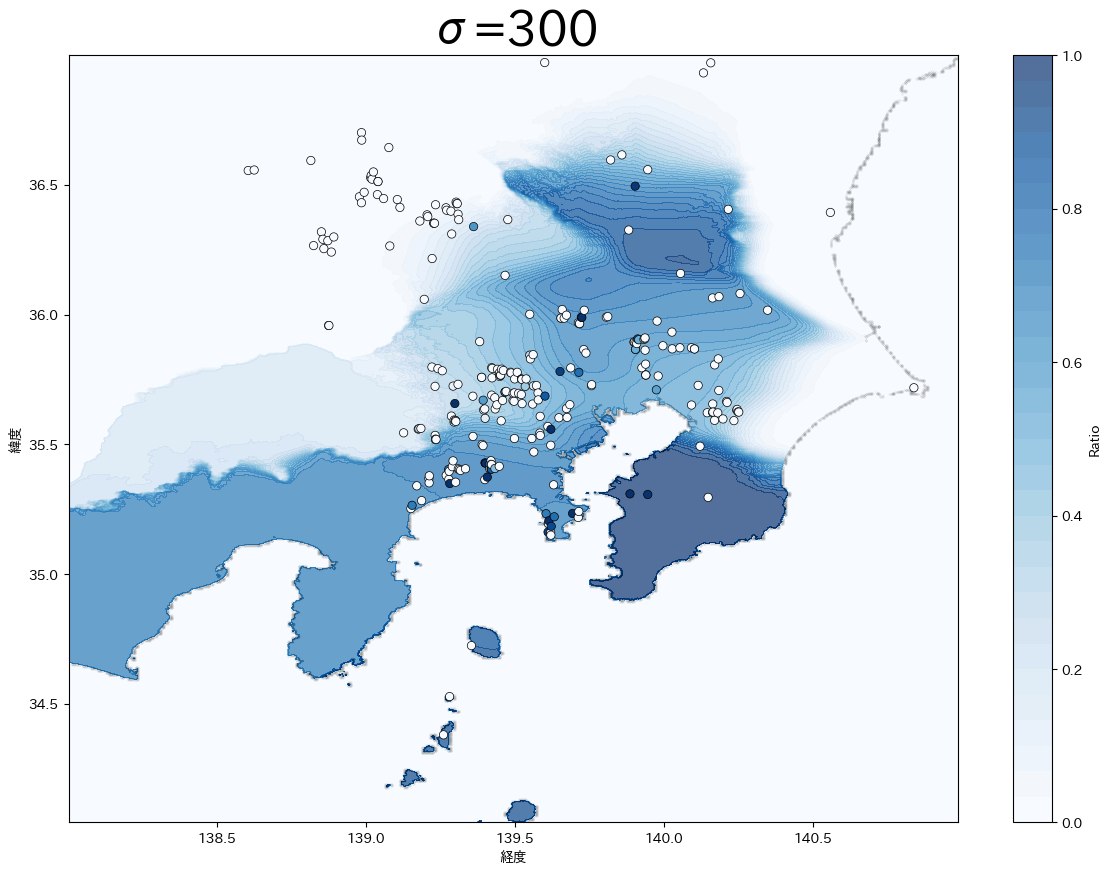

神津島:  20%|██        | 1/5 [00:47<03:09, 47.41s/it, σ=300, σ_sites=0.1, time=47.1s]

creating weights matrix...
calculating distance_W...
updating weights matrix...


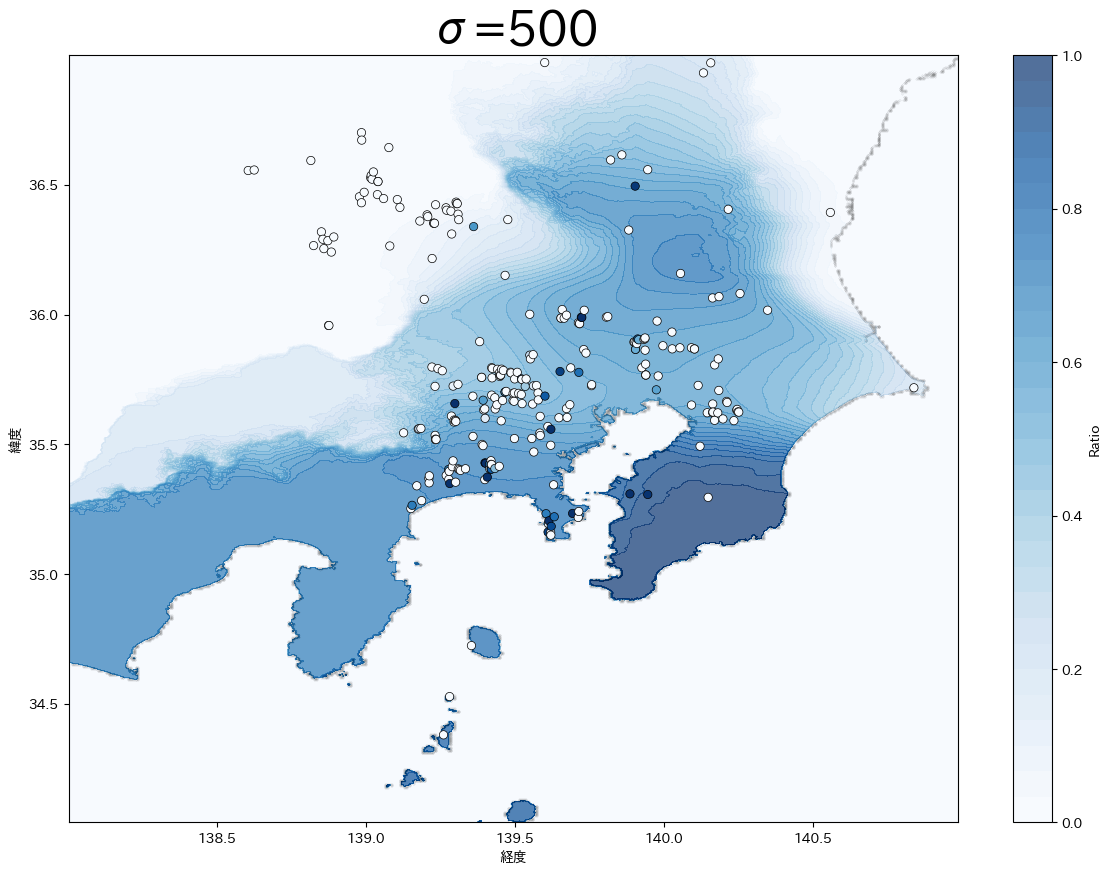

神津島:  40%|████      | 2/5 [01:42<02:35, 51.88s/it, σ=500, σ_sites=0.1, time=54.7s]

creating weights matrix...
calculating distance_W...
updating weights matrix...


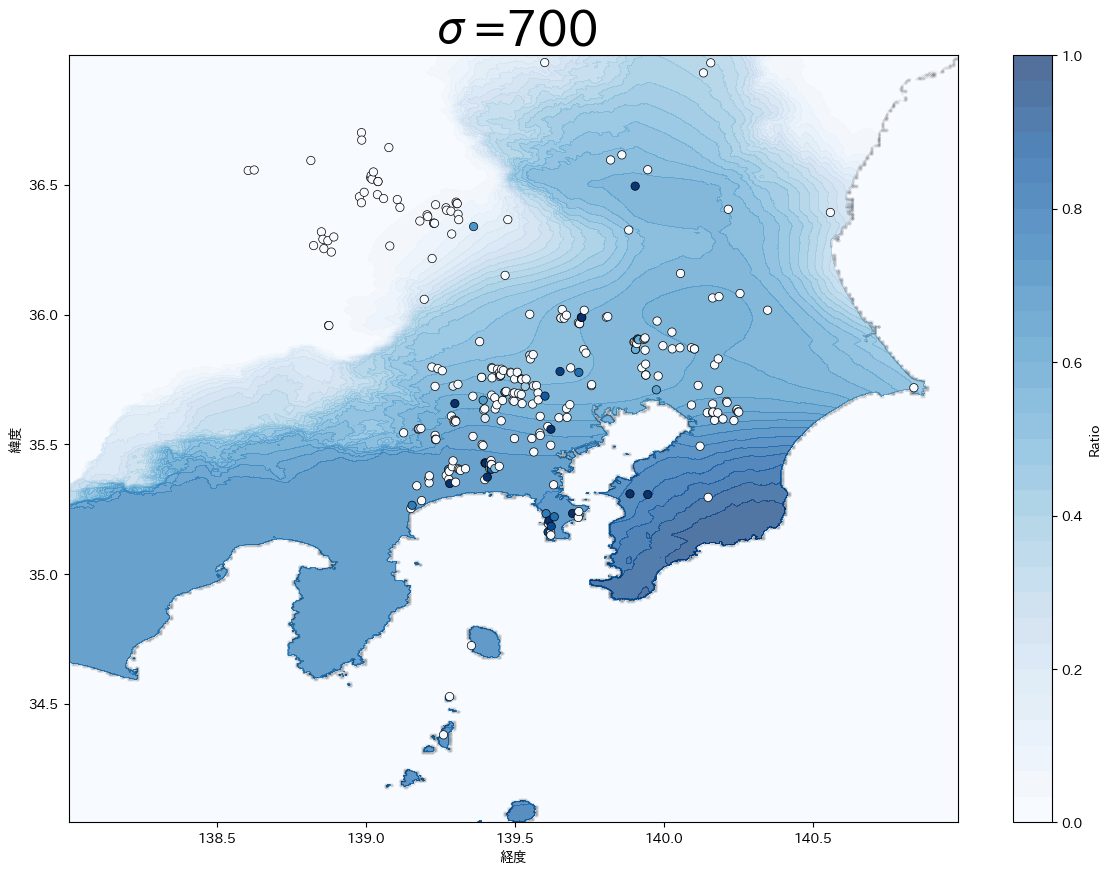

神津島:  60%|██████    | 3/5 [02:36<01:45, 52.79s/it, σ=700, σ_sites=0.1, time=53.6s]

creating weights matrix...
calculating distance_W...
updating weights matrix...


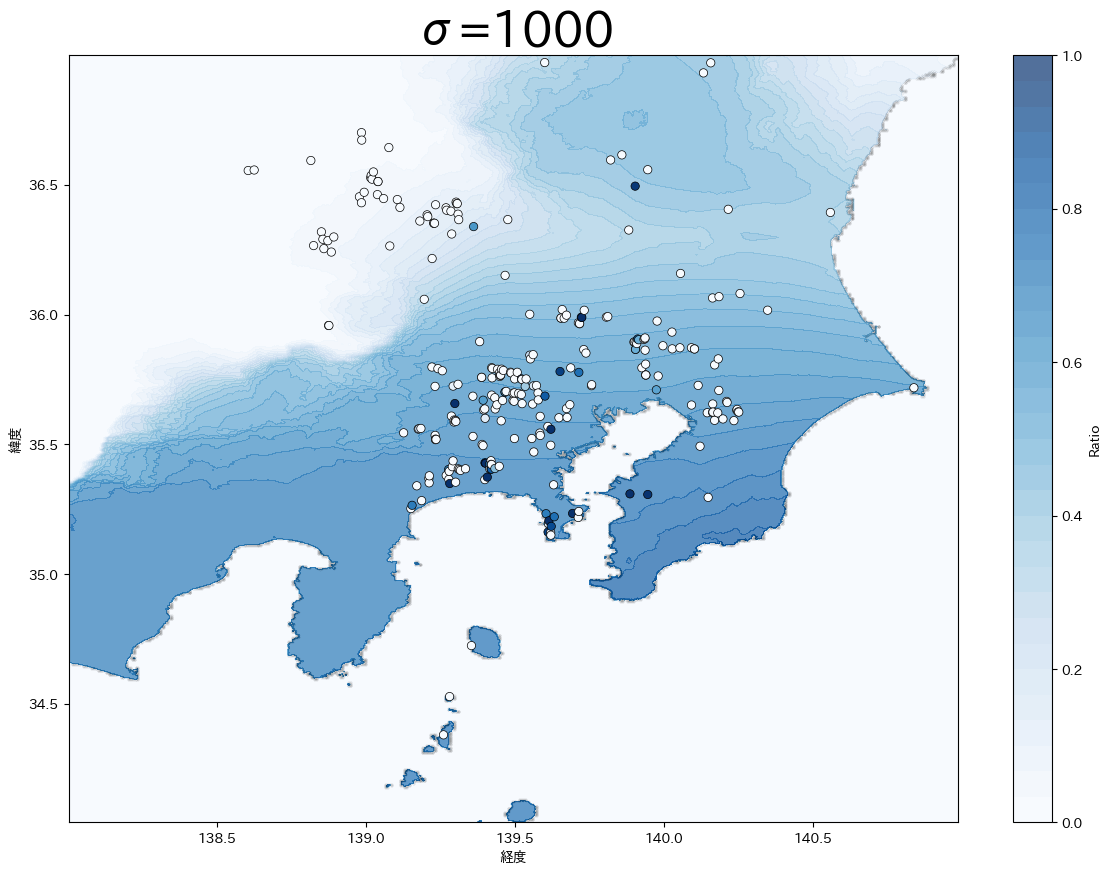

神津島:  80%|████████  | 4/5 [03:36<00:55, 55.63s/it, σ=1000, σ_sites=0.1, time=59.7s]

creating weights matrix...
calculating distance_W...
updating weights matrix...


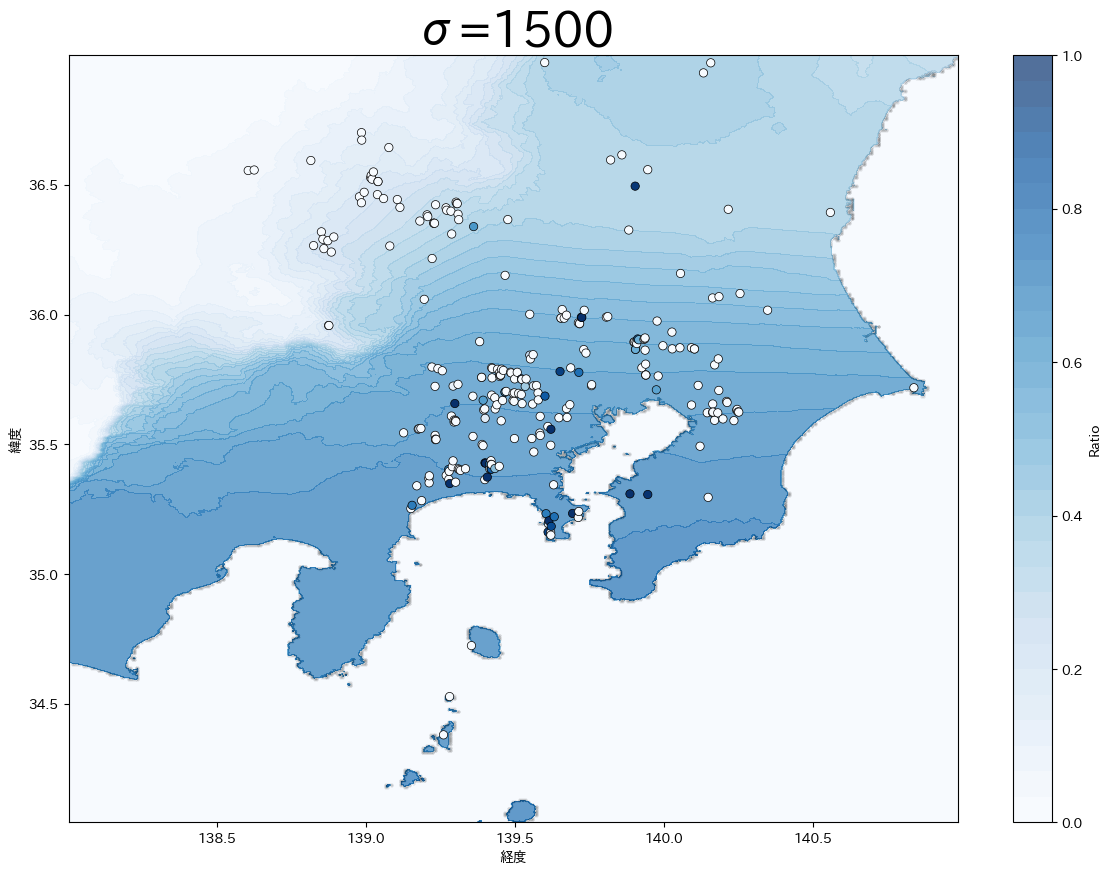

神津島: 100%|██████████| 5/5 [04:42<00:00, 56.59s/it, σ=1500, σ_sites=0.1, time=66.4s]


神津島 の可視化完了！
どの組み合わせが最も適切でしたか？組み合わせ番号を記録してください。


In [ ]:
# 神津島について全組み合わせを可視化
target_origin = "神津島"
total_combinations = len(sigma_candidates) * len(sigma_for_sites_candidates)

print(f"\n=== {target_origin} のハイパーパラメータ比較 ===")
print(f"全 {total_combinations} 組み合わせの可視化")
print("各図を見て、最も適切と思われる分布パターンを記録してください。")
print()

combination_counter = 0
results_kouzu = []

with tqdm(total=total_combinations, desc=f"{target_origin}") as pbar:
    for sigma in sigma_candidates:
        for sigma_for_sites in sigma_for_sites_candidates:
            combination_counter += 1
            start_time = time.time()

            # NW推定器の作成
            nw_estimator = NadarayaWatsonEstimator(
                sigma=sigma, sigma_for_sites=sigma_for_sites
            )

            # モデルの学習（重み行列の計算）
            nw_estimator.fit(preprocessor, config.nw_variable_names)

            # 予測実行
            result = nw_estimator.predict_single(
                preprocessor, target_period, target_origin
            )

            # 可視化（新しい関数を使用）
            fig, ax = ObsidianVisualizer.plot_ratio_map_from_result(
                preprocessor.df_elevation,
                preprocessor.df_sites,
                result["ratio_mesh"],
                result["ratio_sites"],
                target_period,
                target_origin,
                config.time_periods,
                figsize=(12, 9),
            )

            # タイトルにパラメータと組み合わせ番号を追加
            current_title = ax.get_title()
            new_title = f"σ={sigma}"
            ax.set_title(new_title, fontsize=35, fontweight="bold")

            # 統計情報をサブタイトルに追加
            mesh_mean = result["ratio_mesh"].mean()
            mesh_max = result["ratio_mesh"].max()
            sites_mean = result["ratio_sites"].mean()
            execution_time = time.time() - start_time

            stats_text = f"グリッド平均: {mesh_mean:.4f} | 最大: {mesh_max:.4f} | 遺跡平均: {sites_mean:.4f} | 実行時間: {execution_time:.1f}s"
            # plt.figtext(0.5, 0.02, stats_text, ha="center", fontsize=11, style="italic")

            plt.tight_layout()
            plt.subplots_adjust(bottom=0.08)  # 統計情報のスペースを確保
            plt.show()

            # 結果を記録
            results_kouzu.append(
                {
                    "combination": combination_counter,
                    "sigma": sigma,
                    "sigma_for_sites": sigma_for_sites,
                    "mesh_mean": mesh_mean,
                    "mesh_max": mesh_max,
                    "sites_mean": sites_mean,
                    "execution_time": execution_time,
                }
            )

            # 進捗更新
            pbar.set_postfix(
                {
                    "σ": sigma,
                    "σ_sites": sigma_for_sites,
                    "time": f"{execution_time:.1f}s",
                }
            )
            pbar.update(1)

print(f"\n{target_origin} の可視化完了！")
print("どの組み合わせが最も適切でしたか？組み合わせ番号を記録してください。")

## 6. 信州の可視化結果（全パラメータ組み合わせ）

続いて信州について、すべてのパラメータ組み合わせで可視化を行います。


=== 信州 のハイパーパラメータ比較 ===
全 5 組み合わせの可視化
各図を見て、最も適切と思われる分布パターンを記録してください。



信州:   0%|          | 0/5 [00:00<?, ?it/s]

creating weights matrix...


calculating distance_W...
updating weights matrix...


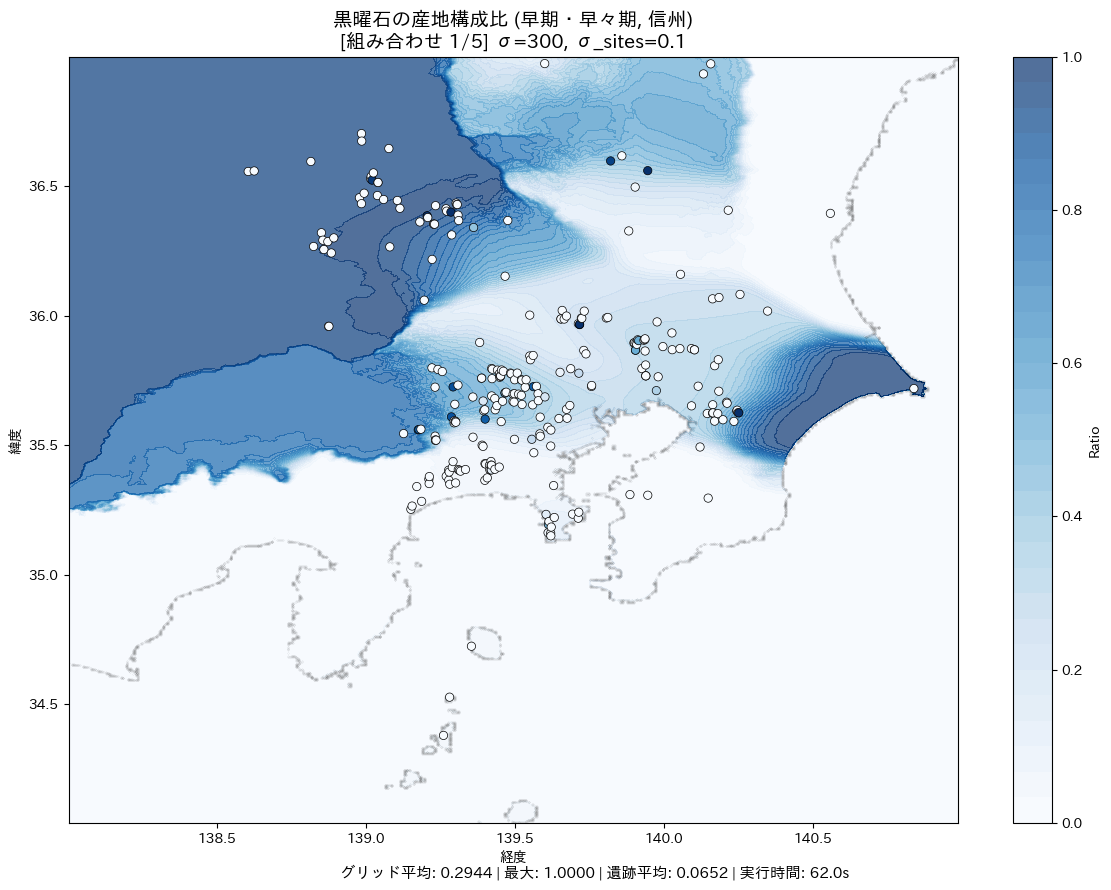

信州:  20%|██        | 1/5 [01:02<04:09, 62.39s/it, σ=300, σ_sites=0.1, time=62.0s]

creating weights matrix...
calculating distance_W...
updating weights matrix...


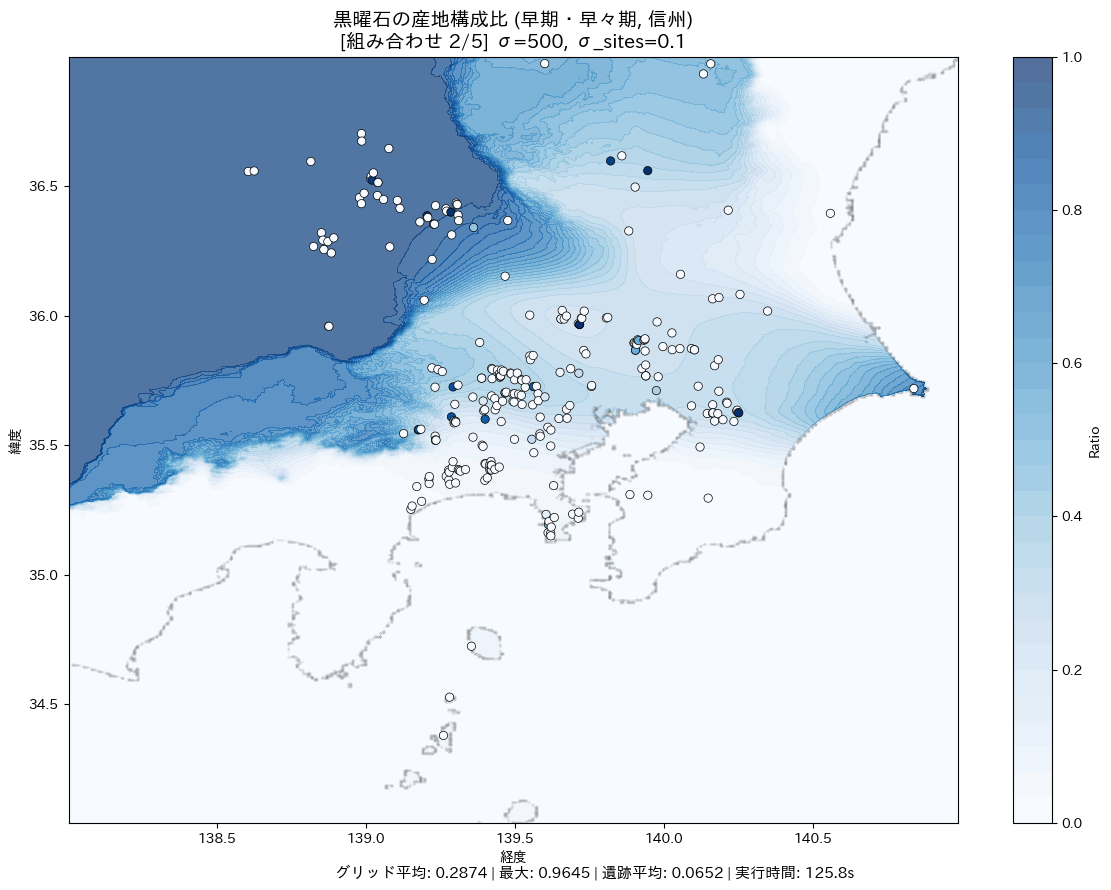

信州:  40%|████      | 2/5 [03:08<04:59, 99.86s/it, σ=500, σ_sites=0.1, time=125.8s]

creating weights matrix...
calculating distance_W...
updating weights matrix...


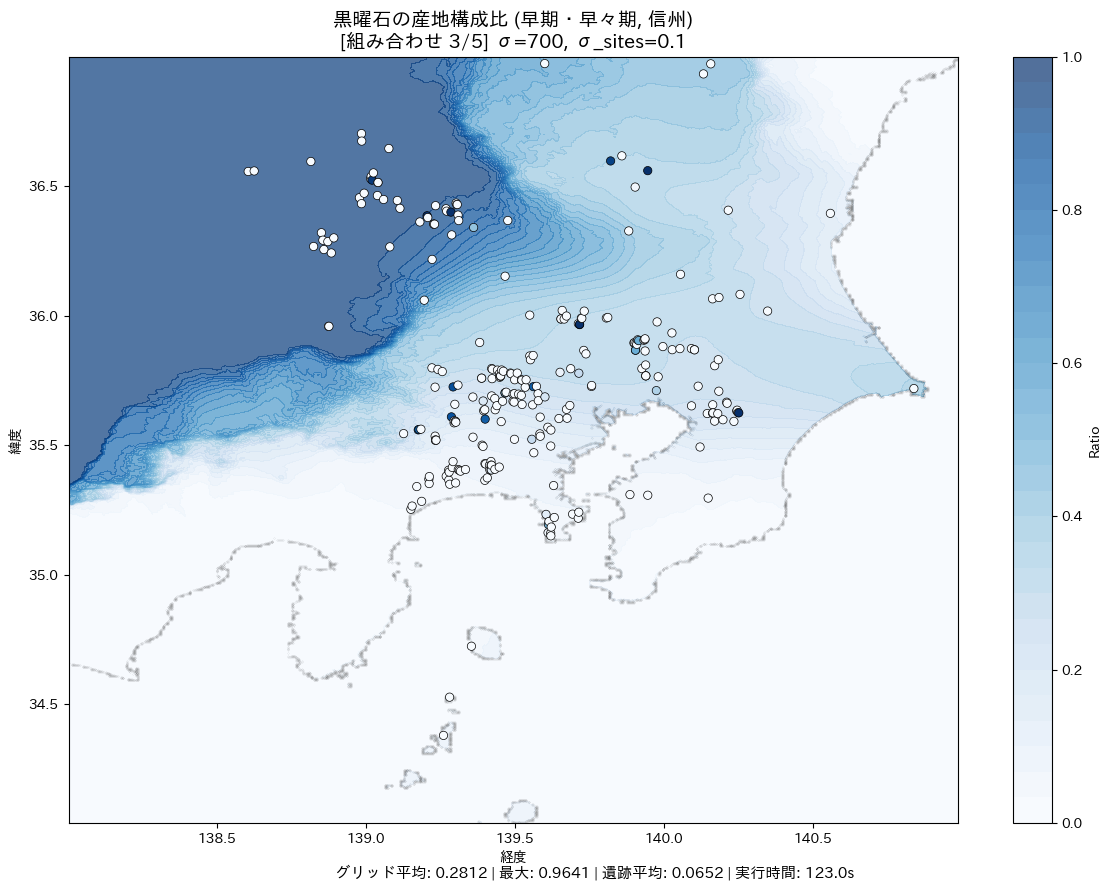

信州:  60%|██████    | 3/5 [05:11<03:41, 110.60s/it, σ=700, σ_sites=0.1, time=123.0s]

creating weights matrix...
calculating distance_W...
updating weights matrix...


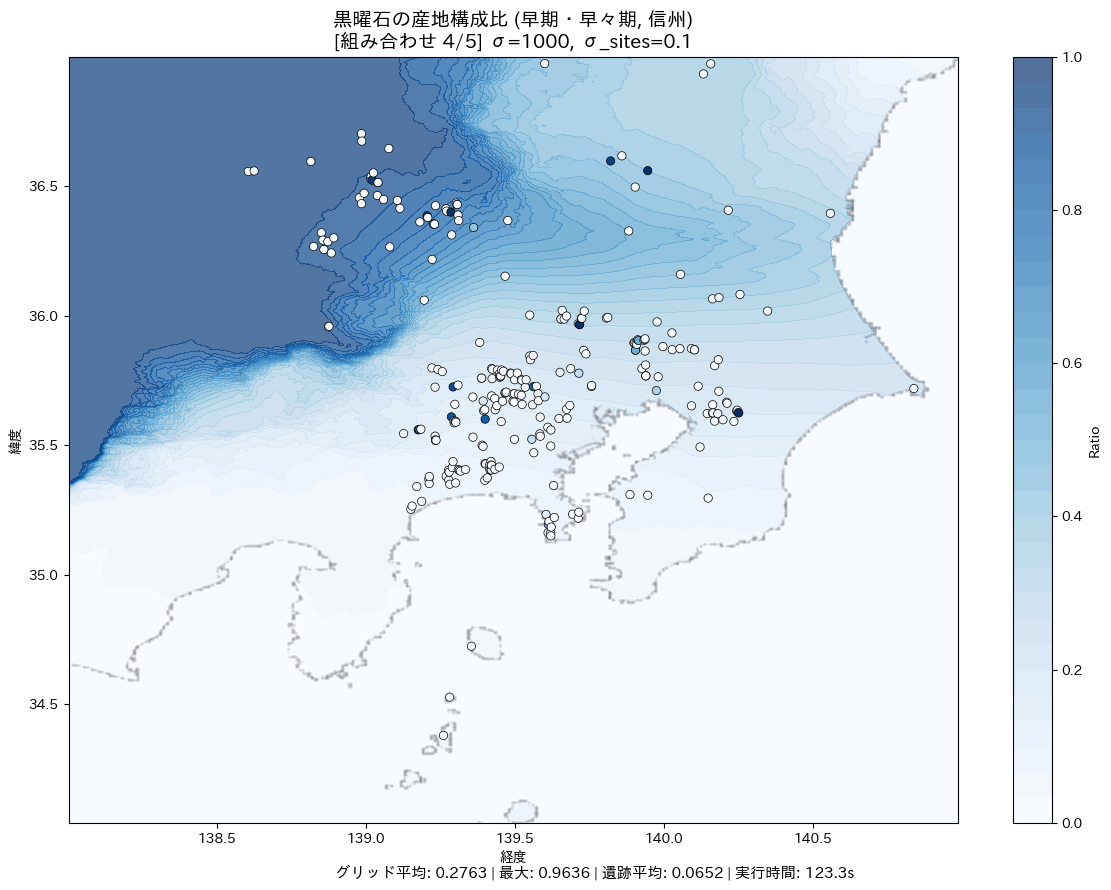

信州:  80%|████████  | 4/5 [07:15<01:55, 115.79s/it, σ=1000, σ_sites=0.1, time=123.3s]

creating weights matrix...
calculating distance_W...
updating weights matrix...


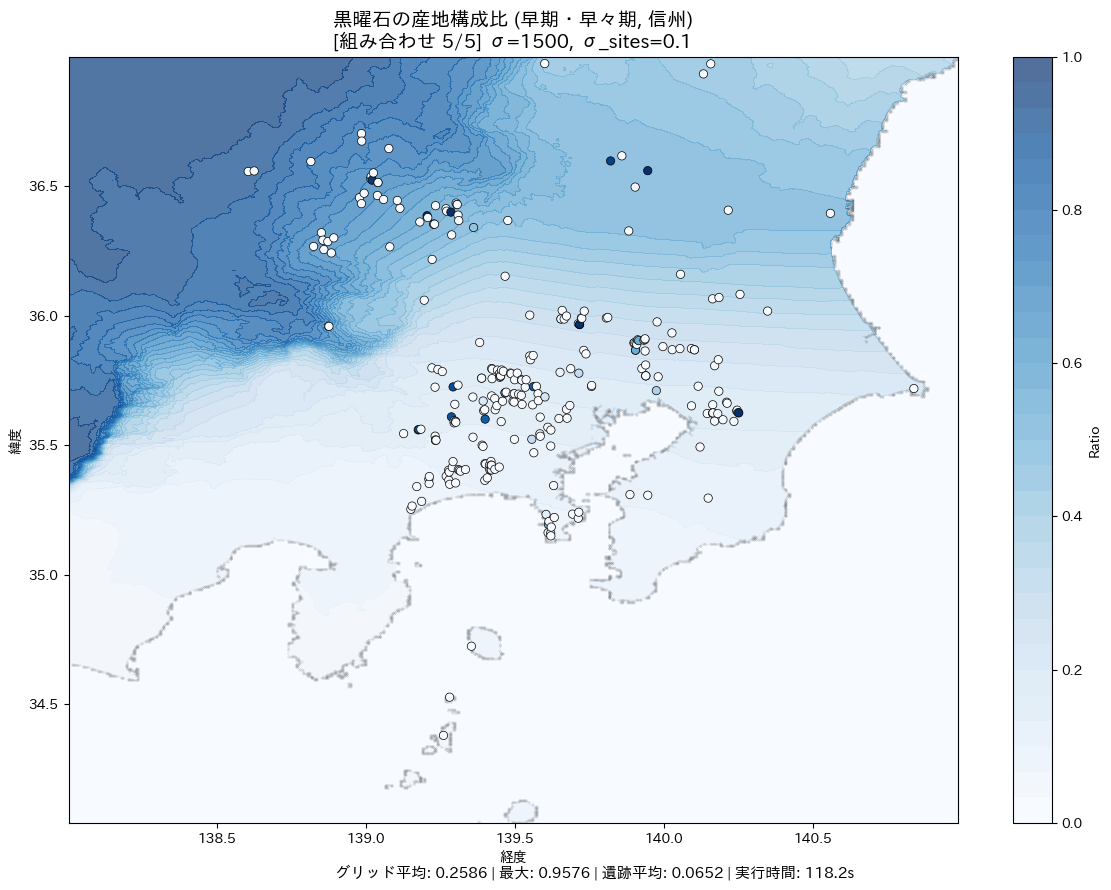

信州: 100%|██████████| 5/5 [09:14<00:00, 110.86s/it, σ=1500, σ_sites=0.1, time=118.2s]


信州 の可視化完了！
どの組み合わせが最も適切でしたか？組み合わせ番号を記録してください。


In [ ]:
# 信州について全組み合わせを可視化
target_origin = "信州"

print(f"\n=== {target_origin} のハイパーパラメータ比較 ===")
print(f"全 {total_combinations} 組み合わせの可視化")
print("各図を見て、最も適切と思われる分布パターンを記録してください。")
print()

combination_counter = 0
results_shinshu = []

with tqdm(total=total_combinations, desc=f"{target_origin}") as pbar:
    for sigma in sigma_candidates:
        for sigma_for_sites in sigma_for_sites_candidates:
            combination_counter += 1
            start_time = time.time()

            # NW推定器の作成
            nw_estimator = NadarayaWatsonEstimator(
                sigma=sigma, sigma_for_sites=sigma_for_sites
            )

            # モデルの学習（重み行列の計算）
            nw_estimator.fit(preprocessor, config.nw_variable_names)

            # 予測実行
            result = nw_estimator.predict_single(
                preprocessor, target_period, target_origin
            )

            # 可視化（新しい関数を使用）
            fig, ax = ObsidianVisualizer.plot_ratio_map_from_result(
                preprocessor.df_elevation,
                preprocessor.df_sites,
                result["ratio_mesh"],
                result["ratio_sites"],
                target_period,
                target_origin,
                config.time_periods,
                figsize=(12, 9),
            )

            # タイトルにパラメータと組み合わせ番号を追加
            current_title = ax.get_title()
            new_title = f"{current_title}\n[組み合わせ {combination_counter}/{total_combinations}] σ={sigma}, σ_sites={sigma_for_sites}"
            ax.set_title(new_title, fontsize=14, fontweight="bold")

            # 統計情報をサブタイトルに追加
            mesh_mean = result["ratio_mesh"].mean()
            mesh_max = result["ratio_mesh"].max()
            sites_mean = result["ratio_sites"].mean()
            execution_time = time.time() - start_time

            stats_text = f"グリッド平均: {mesh_mean:.4f} | 最大: {mesh_max:.4f} | 遺跡平均: {sites_mean:.4f} | 実行時間: {execution_time:.1f}s"
            plt.figtext(0.5, 0.02, stats_text, ha="center", fontsize=11, style="italic")

            plt.tight_layout()
            plt.subplots_adjust(bottom=0.08)  # 統計情報のスペースを確保
            plt.show()

            # 結果を記録
            results_shinshu.append(
                {
                    "combination": combination_counter,
                    "sigma": sigma,
                    "sigma_for_sites": sigma_for_sites,
                    "mesh_mean": mesh_mean,
                    "mesh_max": mesh_max,
                    "sites_mean": sites_mean,
                    "execution_time": execution_time,
                }
            )

            # 進捗更新
            pbar.set_postfix(
                {
                    "σ": sigma,
                    "σ_sites": sigma_for_sites,
                    "time": f"{execution_time:.1f}s",
                }
            )
            pbar.update(1)

print(f"\n{target_origin} の可視化完了！")
print("どの組み合わせが最も適切でしたか？組み合わせ番号を記録してください。")

## 7. 結果の要約と保存

In [ ]:
# 結果の要約表示
print("\n" + "=" * 80)
print("   ハイパーパラメータ可視化探索結果の要約")
print("=" * 80)

# 神津島の統計要約
print("\n【神津島の統計要約】")
kouzu_df = pd.DataFrame(results_kouzu)
print(f"平均実行時間: {kouzu_df['execution_time'].mean():.1f}秒")
print(
    f"グリッド平均値の範囲: {kouzu_df['mesh_mean'].min():.4f} ~ {kouzu_df['mesh_mean'].max():.4f}"
)
print(
    f"最大値の範囲: {kouzu_df['mesh_max'].min():.4f} ~ {kouzu_df['mesh_max'].max():.4f}"
)

# 信州の統計要約
print("\n【信州の統計要約】")
shinshu_df = pd.DataFrame(results_shinshu)
print(f"平均実行時間: {shinshu_df['execution_time'].mean():.1f}秒")
print(
    f"グリッド平均値の範囲: {shinshu_df['mesh_mean'].min():.4f} ~ {shinshu_df['mesh_mean'].max():.4f}"
)
print(
    f"最大値の範囲: {shinshu_df['mesh_max'].min():.4f} ~ {shinshu_df['mesh_max'].max():.4f}"
)

# 結果の保存
all_results = []
for result in results_kouzu:
    result["target_origin"] = "神津島"
    all_results.append(result)
for result in results_shinshu:
    result["target_origin"] = "信州"
    all_results.append(result)

results_df = pd.DataFrame(all_results)
results_df.to_csv(
    os.path.join(data_dir, "hyperparameter_visual_search_results.csv"), index=False
)

print("\nハイパーパラメータ探索結果を保存しました:")
print(f"ファイル: {os.path.join(data_dir, 'hyperparameter_visual_search_results.csv')}")

print("\n" + "=" * 80)
print("   パラメータ選択の指針")
print("=" * 80)
print("上記の可視化結果を見て、以下の基準で最適なパラメータを選択してください：")
print("")
print("✓ 分布の滑らかさ: 急激な変化がなく、地理的に自然な分布")
print("✓ 地理的合理性: 遺跡の位置や地形と整合する分布パターン")
print("✓ 遺跡データとの整合性: 遺跡での観測値と予測値の一致度")
print("✓ 解釈可能性: 考古学的知見と矛盾しないパターン")
print("✓ 実行時間: 実用的な計算時間")
print("")
print("選択したパラメータを次のセルで設定し、詳細分析を実行してください。")


   ハイパーパラメータ可視化探索結果の要約

【神津島の統計要約】


平均実行時間: 56.3秒
グリッド平均値の範囲: 0.1803 ~ 0.2483
最大値の範囲: 0.7889 ~ 0.9892

【信州の統計要約】
平均実行時間: 110.5秒
グリッド平均値の範囲: 0.2586 ~ 0.2944
最大値の範囲: 0.9576 ~ 1.0000

ハイパーパラメータ探索結果を保存しました:
ファイル: /home/ohta/dev/bayesian_statistics/data/hyperparameter_visual_search_results.csv

   パラメータ選択の指針
上記の可視化結果を見て、以下の基準で最適なパラメータを選択してください：

✓ 分布の滑らかさ: 急激な変化がなく、地理的に自然な分布
✓ 地理的合理性: 遺跡の位置や地形と整合する分布パターン
✓ 遺跡データとの整合性: 遺跡での観測値と予測値の一致度
✓ 解釈可能性: 考古学的知見と矛盾しないパターン
✓ 実行時間: 実用的な計算時間

選択したパラメータを次のセルで設定し、詳細分析を実行してください。


## 8. 選択したパラメータでの詳細分析

上記の可視化結果から最適と判断したパラメータを設定して、詳細分析を行います。

In [ ]:
# 選択したパラメータを設定（可視化結果を見て変更してください）
selected_sigma = 500  # 選択したsigma値
selected_sigma_for_sites = 0.1  # 選択したsigma_for_sites値

print("\n【最終選択パラメータ】")
print(f"sigma: {selected_sigma}")
print(f"sigma_for_sites: {selected_sigma_for_sites}")

# 選択理由を記録（コメントとして記入してください）
selection_reason = """
選択理由:
- 神津島: 組み合わせ○番が最も適切（理由を記入）
- 信州: 組み合わせ○番が最も適切（理由を記入）
- 総合判断: ...
"""
print(selection_reason)


【最終選択パラメータ】
sigma: 500
sigma_for_sites: 0.1

選択理由:
- 神津島: 組み合わせ○番が最も適切（理由を記入）
- 信州: 組み合わせ○番が最も適切（理由を記入）
- 総合判断: ...



: 

In [ ]:
# 選択したパラメータでの詳細分析
print("\n=== 選択したパラメータでの詳細結果 ===")

selected_nw_estimator = NadarayaWatsonEstimator(
    sigma=selected_sigma, sigma_for_sites=selected_sigma_for_sites
)

# モデルの学習
selected_nw_estimator.fit(preprocessor, config.nw_variable_names)

for target_origin in target_origins:
    result = selected_nw_estimator.predict_single(
        preprocessor, target_period, target_origin
    )

    fig, ax = ObsidianVisualizer.plot_ratio_map_from_result(
        preprocessor.df_elevation,
        preprocessor.df_sites,
        result["ratio_mesh"],
        result["ratio_sites"],
        target_period,
        target_origin,
        config.time_periods,
        figsize=(14, 11),
    )

    current_title = ax.get_title()
    new_title = f"{current_title}\n【最終選択】σ={selected_sigma}, σ_sites={selected_sigma_for_sites}"
    ax.set_title(new_title, fontsize=16, fontweight="bold", color="darkred")

    plt.show()

    print(f"\n【{target_origin} の最終統計】")
    print(f"  グリッド平均比率: {result['ratio_mesh'].mean():.4f}")
    print(f"  グリッド最大比率: {result['ratio_mesh'].max():.4f}")
    print(f"  グリッド標準偏差: {result['ratio_mesh'].std():.4f}")
    print(f"  遺跡平均比率: {result['ratio_sites'].mean():.4f}")
    print(f"  遺跡最大比率: {result['ratio_sites'].max():.4f}")
    print(f"  遺跡標準偏差: {result['ratio_sites'].std():.4f}")
    print(f"  非ゼロ領域の割合: {(result['ratio_mesh'] > 0).mean():.4f}")


=== 選択したパラメータでの詳細結果 ===
creating weights matrix...
calculating distance_W...


## 9. まとめ

このノートブックでは、Nadaraya-Watson推定のハイパーパラメータを可視化による比較で最適化しました。

**実行内容:**
- 6つのsigma値 × 4つのsigma_for_sites値 = 24組み合わせ
- 神津島・信州の2産地 × 24組み合わせ = 48枚の可視化結果
- 見た目による最適パラメータの選択
- 選択したパラメータでの詳細分析

**選択したパラメータ:** sigma={selected_sigma}, sigma_for_sites={selected_sigma_for_sites}

この結果は、Nadaraya-Watson推定の最適化において可視化による判断の重要性を示しています。